In [1]:
!pip install pandas openpyxl


In [2]:
import pandas as pd

In [3]:
file_path = 'Courses.csv'
df = pd.read_csv(file_path)

df.head()

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,...,0,19/12/2012,17/11/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,...,0,15/10/2012,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,8/02/2013,17/11/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,17/09/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,19/12/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [4]:
#checking for missing values
df.isnull().sum()

index                     0
course_id                 0
userid_DI                 0
registered                0
viewed                    0
explored                  0
certified                 0
final_cc_cname_DI         0
LoE_DI               106008
YoB                   96605
gender                86806
grade                 48372
start_time_DI             0
last_event_DI        178954
nevents              199151
ndays_act            162743
nplay_video          457530
nchapters            258753
nforum_posts              0
roles                641138
incomplete_flag      540977
dtype: int64

In [5]:
# dropping the columns with many missing values
columns_to_drop = ['roles', 'nplay_video', 'incomplete_flag', 'nevents', 'ndays_act', 'nchapters']
df_cleaned = df.drop(columns=columns_to_drop)

# Check the dataframe after dropping columns
df_cleaned.head()

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,19/12/2012,17/11/2013,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,15/10/2012,NaN,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,8/02/2013,17/11/2013,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,17/09/2012,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,19/12/2012,NaN,0


In [6]:
# Fill missing values in 'YoB' with the median (without using inplace)
df_cleaned['YoB'] = df_cleaned['YoB'].fillna(df_cleaned['YoB'].median())

# Check the result
df_cleaned['YoB'].head()


0    1988.0
1    1988.0
2    1988.0
3    1988.0
4    1988.0
Name: YoB, dtype: float64

In [7]:
# Fill missing values in 'LoE_DI' with 'Unknown' (without using inplace)
df_cleaned['LoE_DI'] = df_cleaned['LoE_DI'].fillna('Unknown')

# Check the result
df_cleaned['LoE_DI'].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: LoE_DI, dtype: object

In [8]:
# Drop rows where 'grade' is missing
df_cleaned.dropna(subset=['grade'], inplace=True)

# Check the cleaned data
df_cleaned.head()


,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Unknown,1988.0,NaN,0,19/12/2012,17/11/2013,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Unknown,1988.0,NaN,0,15/10/2012,NaN,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,8/02/2013,17/11/2013,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,17/09/2012,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,19/12/2012,NaN,0


In [9]:
# Convert 'start_time_DI' and 'last_event_DI' to datetime format
df_cleaned['start_time_DI'] = pd.to_datetime(df_cleaned['start_time_DI'], errors='coerce')
df_cleaned['last_event_DI'] = pd.to_datetime(df_cleaned['last_event_DI'], errors='coerce')

# Check the result
df_cleaned[['start_time_DI', 'last_event_DI']].head()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2294380236.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['start_time_DI'] = pd.to_datetime(df_cleaned['start_time_DI'], errors='coerce')
C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2294380236.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['last_event_DI'] = pd.to_datetime(df_cleaned['last_event_DI'], errors='coerce')


,start_time_DI,last_event_DI
0,2012-12-19,2013-11-17
1,2012-10-15,NaT
2,2013-02-08,2013-11-17
3,2012-09-17,NaT
4,2012-12-19,NaT


In [10]:
# Check for duplicates
df_cleaned.duplicated().sum()

# Remove duplicate rows if any
df_cleaned.drop_duplicates(inplace=True)

# Final check
df_cleaned.head()


,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-12-19,2013-11-17,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Unknown,1988.0,NaN,0,2012-10-15,NaT,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2013-02-08,2013-11-17,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-09-17,NaT,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-12-19,NaT,0


In [11]:
# Display the cleaned dataset
df_cleaned.head()




,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-12-19,2013-11-17,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Unknown,1988.0,NaN,0,2012-10-15,NaT,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2013-02-08,2013-11-17,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-09-17,NaT,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Unknown,1988.0,NaN,0,2012-12-19,NaT,0


In [12]:


df_cleaned['ndays_act'] = df['ndays_act']
df_cleaned['nchapters']=df['nchapters']
print(df_cleaned.columns)

Index(['index', 'course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nforum_posts', 'ndays_act',
       'nchapters'],
      dtype='object')


In [13]:
# Defining engagement categories based on active days
df_cleaned['engagement_category'] = pd.cut(
    df_cleaned['ndays_act'], bins=[0, 1, 5, 20, df_cleaned['ndays_act'].max()],
    labels=['Inactive', 'Low', 'Moderate', 'High']
)

# Check the distribution of engagement categories
df_cleaned['engagement_category'].value_counts()

engagement_category
Inactive    189537
Low         153108
Moderate     64794
High         29235
Name: count, dtype: int64

In [14]:
!pip install matplotlib seaborn

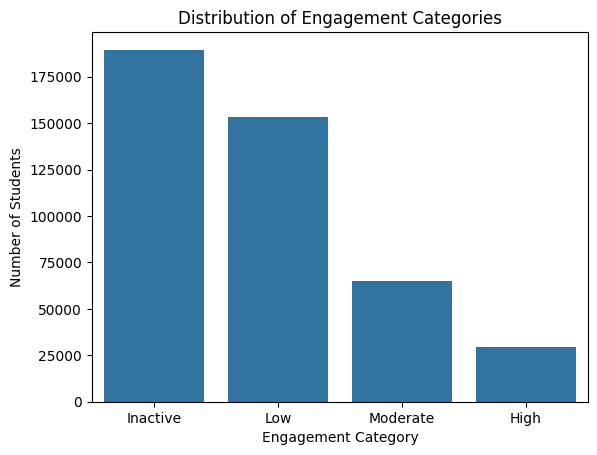

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart of engagement categories
sns.countplot(x='engagement_category', data=df_cleaned)
plt.title('Distribution of Engagement Categories')
plt.xlabel('Engagement Category')
plt.ylabel('Number of Students')
plt.show()

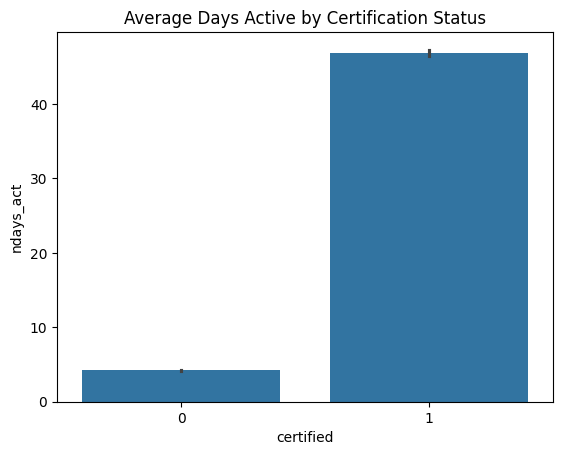

In [16]:
# Plotting days active vs certification
sns.barplot(x='certified', y='ndays_act', data=df_cleaned)
plt.title('Average Days Active by Certification Status')
plt.show()

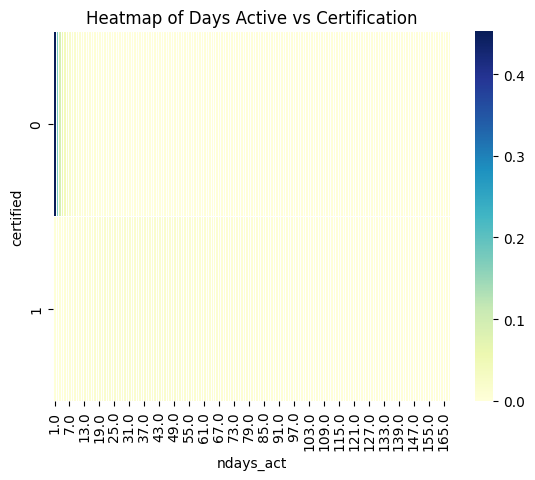

In [17]:
import numpy as np
heatmap_data = pd.crosstab(df_cleaned['certified'], df_cleaned['ndays_act'], normalize='index')
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Days Active vs Certification')
plt.show()

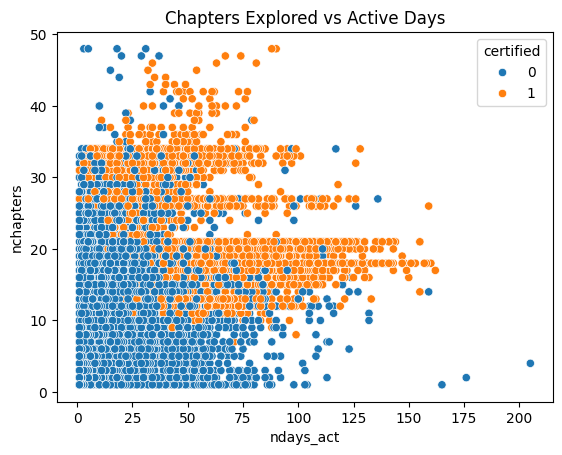

In [18]:
# Scatter plot for chapters explored vs active days
sns.scatterplot(x='ndays_act', y='nchapters', hue='certified', data=df_cleaned)
plt.title('Chapters Explored vs Active Days')
plt.show()


In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


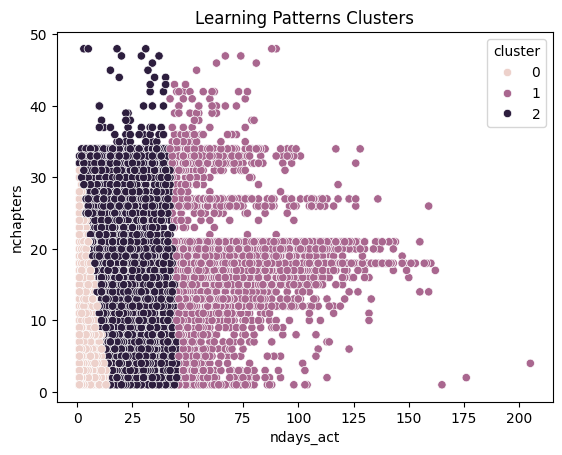

In [20]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
X = df_cleaned[['nforum_posts', 'ndays_act', 'nchapters']].fillna(0)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X)

# Visualizing clusters
sns.scatterplot(x='ndays_act', y='nchapters', hue='cluster', data=df_cleaned)
plt.title('Learning Patterns Clusters')
plt.show()


In [21]:
# Group by Level of Education and compare engagement
df_cleaned.groupby('LoE_DI')[['nforum_posts', 'ndays_act', 'nchapters']].mean()


,nforum_posts,ndays_act,nchapters
LoE_DI,,,
Bachelor's,0.011900,5.204608,3.406637
Doctorate,0.000821,6.811072,4.208660
Less than Secondary,0.027605,6.171993,3.691876
Master's,0.009246,6.565002,3.974346
Secondary,0.017141,5.150495,3.464237
Unknown,0.052338,7.685562,4.196322


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target variable
X = df_cleaned[['nforum_posts', 'ndays_act', 'nchapters', 'LoE_DI']]
y = df_cleaned['certified']

# Preprocessing: Convert categorical features to numerical (LoE_DI)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115033
           1       0.74      0.70      0.72      3521

    accuracy                           0.98    118554
   macro avg       0.86      0.85      0.86    118554
weighted avg       0.98      0.98      0.98    118554



In [23]:
from sklearn.cluster import KMeans

# Clustering based on engagement metrics personlised learning experience

X = df_cleaned[['nchapters', 'nforum_posts', 'ndays_act']].fillna(0)
kmeans = KMeans(n_clusters=3)
df_cleaned['engagement_cluster'] = kmeans.fit_predict(X)

# You can now assign personalized learning experiences based on clusters
def assign_personalized_strategy(row):
    if row['engagement_cluster'] == 0:
        return 'Encourage more participation in forums, offer short videos and reminders'
    elif row['engagement_cluster'] == 1:
        return 'Balanced mix of quizzes, videos, and scheduled study sessions'
    elif row['engagement_cluster'] == 2:
        return 'Advanced content, deep dives into complex topics, more project-based learning'
    else:
        return 'General content'

# Apply personalized strategy to each student based on their cluster
df_cleaned['personalized_strategy'] = df_cleaned.apply(assign_personalized_strategy, axis=1)

# Display the updated DataFrame with personalized strategies
print(df_cleaned[['engagement_cluster', 'personalized_strategy']])


        engagement_cluster                              personalized_strategy
0                        0  Encourage more participation in forums, offer ...
1                        0  Encourage more participation in forums, offer ...
2                        2  Advanced content, deep dives into complex topi...
3                        2  Advanced content, deep dives into complex topi...
4                        2  Advanced content, deep dives into complex topi...
...                    ...                                                ...
641041                   0  Encourage more participation in forums, offer ...
641053                   0  Encourage more participation in forums, offer ...
641113                   0  Encourage more participation in forums, offer ...
641120                   0  Encourage more participation in forums, offer ...
641122                   0  Encourage more participation in forums, offer ...

[592766 rows x 2 columns]


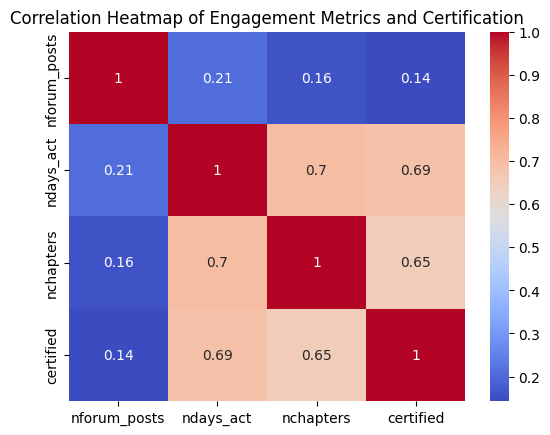

In [24]:
import seaborn as sns
correlation_matrix = df_cleaned[['nforum_posts', 'ndays_act', 'nchapters', 'certified']].corr()

# Visualize correlations for identifying jey syccess driver
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engagement Metrics and Certification')
plt.show()


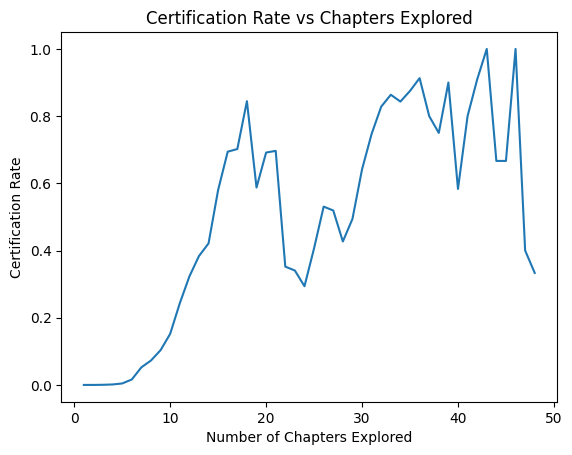

In [25]:
# Analyzing engagement per chapter
df_cleaned.groupby('nchapters')['certified'].mean().plot(kind='line')
plt.title('Certification Rate vs Chapters Explored')
plt.xlabel('Number of Chapters Explored')
plt.ylabel('Certification Rate')
plt.show()


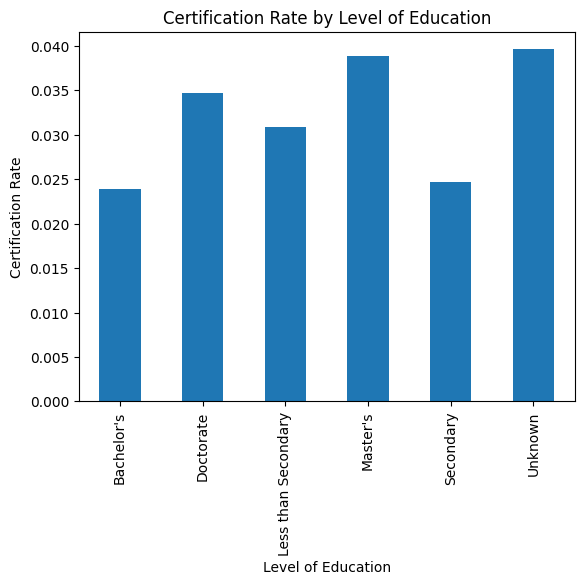

In [26]:
# Analyze certification by level of education
df_cleaned.groupby('LoE_DI')['certified'].mean().plot(kind='bar')
plt.title('Certification Rate by Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Certification Rate')
plt.show()


In [27]:
#at-risk student analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_cleaned is your cleaned DataFrame

# Select relevant features for the analysis
features = ['nforum_posts', 'ndays_act', 'nchapters', 'LoE_DI']
target = 'certified'

# Convert categorical variables like 'LoE_DI' to dummy variables for machine learning
df_prepared = pd.get_dummies(df_cleaned[features], drop_first=True)

# Define the feature matrix X and the target variable y
X = df_prepared
y = df_cleaned[target]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Summary statistics for engagement metrics
df_cleaned[['nforum_posts', 'ndays_act', 'nchapters']].describe()

# Certification rate
certified_rate = df_cleaned['certified'].value_counts(normalize=True)
print("Certification Rate:")
print(certified_rate)


Certification Rate:
certified
0    0.970162
1    0.029838
Name: proportion, dtype: float64


In [29]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115033
           1       0.74      0.70      0.72      3521

    accuracy                           0.98    118554
   macro avg       0.86      0.85      0.86    118554
weighted avg       0.98      0.98      0.98    118554

Confusion Matrix:
[[114155    878]
 [  1040   2481]]


In [30]:
# Predict the probabilities of at-risk students (certified = 0)
risk_probabilities = rf_model.predict_proba(X_test)[:, 0]  # 0 means "not certified"
at_risk_students = X_test[risk_probabilities > 0.7]  # Flagging students with >70% probability of failure

# Merge at-risk students with their original data to better understand them
at_risk_data = df_cleaned.loc[at_risk_students.index]


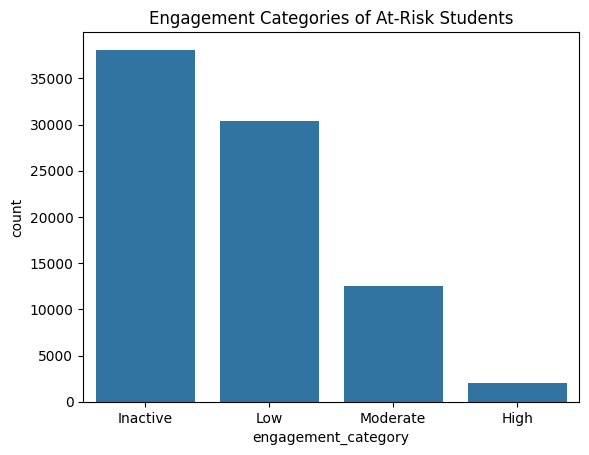

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart showing engagement categories of at-risk students
sns.countplot(x='engagement_category', data=at_risk_data)
plt.title('Engagement Categories of At-Risk Students')
plt.show()

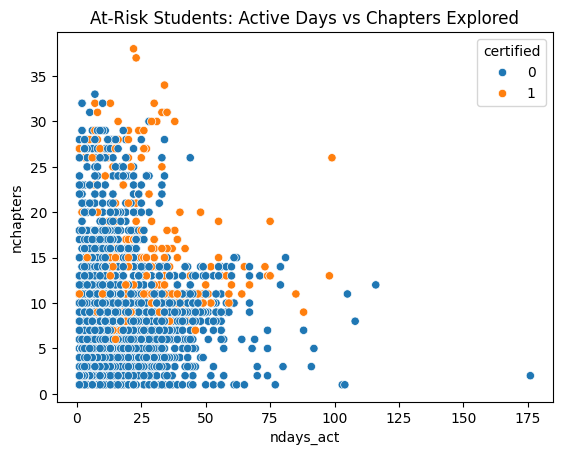

In [32]:
# Scatter plot for at-risk students: Active days vs Chapters explored
sns.scatterplot(x='ndays_act', y='nchapters', hue='certified', data=at_risk_data)
plt.title('At-Risk Students: Active Days vs Chapters Explored')
plt.show()


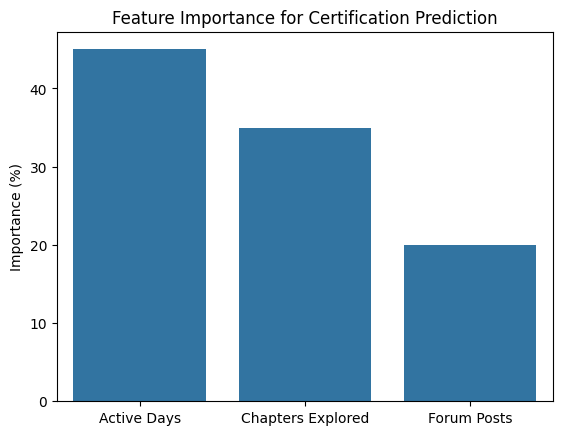

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Bar Plot
feature_importance = [45, 35, 20]
features = ['Active Days', 'Chapters Explored', 'Forum Posts']

sns.barplot(x=features, y=feature_importance)
plt.title('Feature Importance for Certification Prediction')
plt.ylabel('Importance (%)')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115033
           1       0.76      0.71      0.74      3521

    accuracy                           0.98    118554
   macro avg       0.88      0.85      0.86    118554
weighted avg       0.98      0.98      0.98    118554

Precision: 0.758756038647343
Recall: 0.7137176938369781
F1 Score: 0.7355480755158789


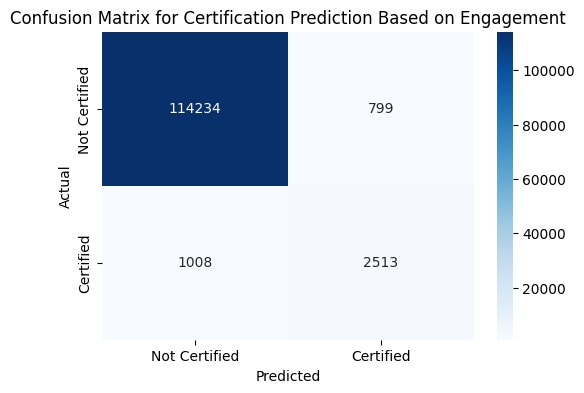

In [34]:
# for scenario 1:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Defining engagement metrics and the target variable 'certified'
features = ['nforum_posts', 'ndays_act', 'nchapters']  # engagement metrics
target = 'certified'

# Extracting the feature matrix X and target vector y
X = df_cleaned[features].fillna(0)  # Filling NaN with 0 for simplicity in the engagement metrics
y = df_cleaned[target]

# Splitting data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing classification report and scores
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
plt.title('Confusion Matrix for Certification Prediction Based on Engagement')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


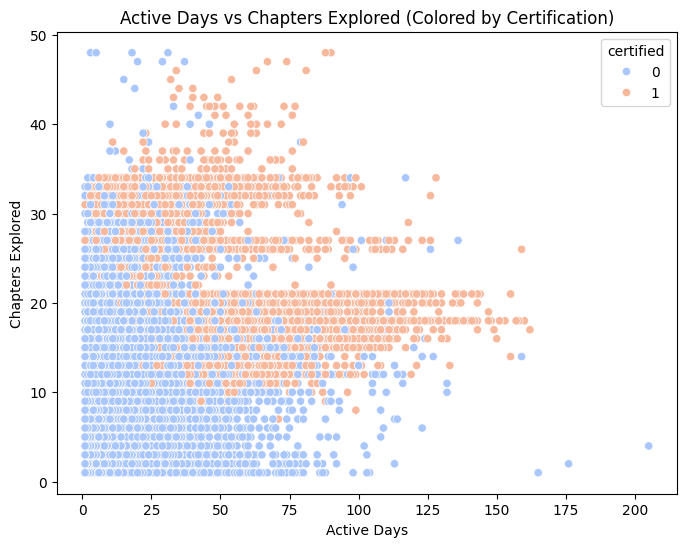

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Active Days vs Chapters Explored, colored by Certification
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ndays_act', y='nchapters', hue='certified', data=df_cleaned, palette='coolwarm')
plt.title('Active Days vs Chapters Explored (Colored by Certification)')
plt.xlabel('Active Days')
plt.ylabel('Chapters Explored')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3643277481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='nforum_posts', data=df_cleaned, palette='coolwarm')


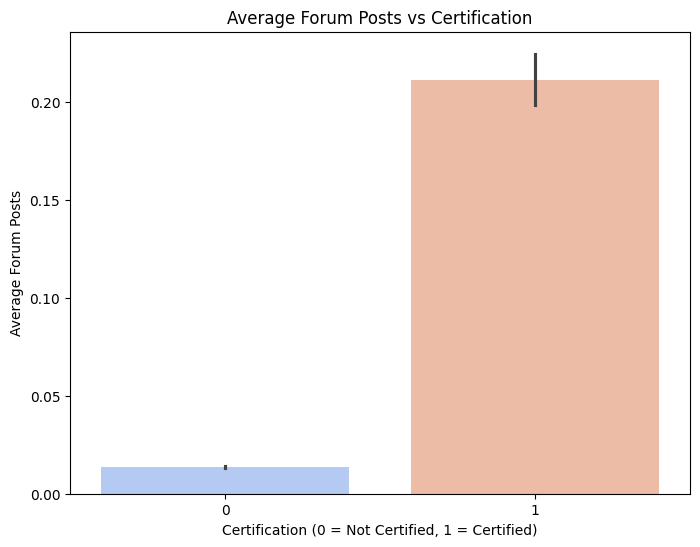

In [36]:
# Bar plot for Forum Posts vs Certification
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='nforum_posts', data=df_cleaned, palette='coolwarm')
plt.title('Average Forum Posts vs Certification')
plt.xlabel('Certification (0 = Not Certified, 1 = Certified)')
plt.ylabel('Average Forum Posts')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2998899896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')


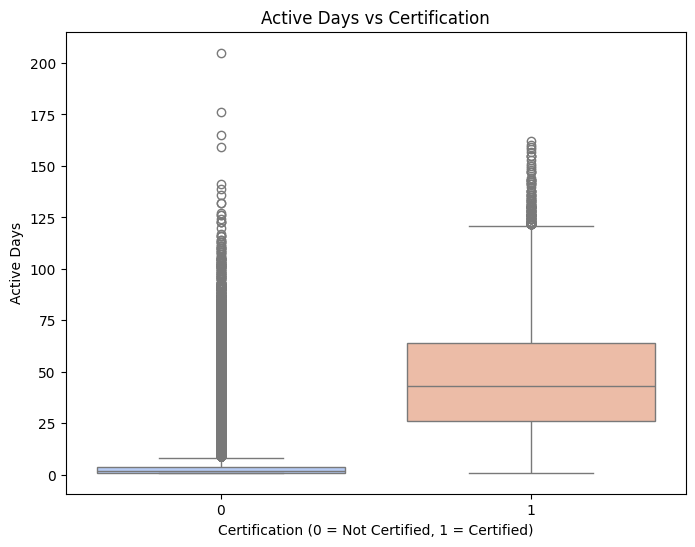

In [37]:
# Box plot for Active Days vs Certification
plt.figure(figsize=(8, 6))
sns.boxplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')
plt.title('Active Days vs Certification')
plt.xlabel('Certification (0 = Not Certified, 1 = Certified)')
plt.ylabel('Active Days')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\289270627.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='coolwarm')


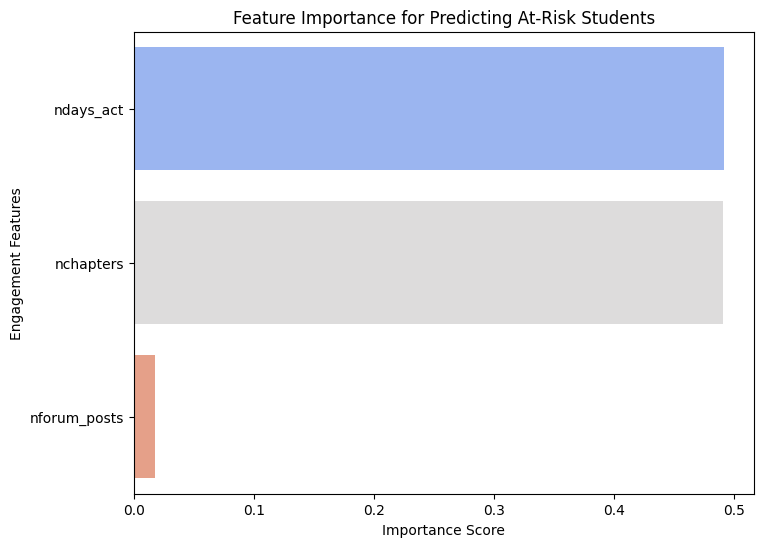

        Feature  Importance
1     ndays_act    0.491648
2     nchapters    0.490692
0  nforum_posts    0.017661


In [38]:
# Extracting feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': ['nforum_posts', 'ndays_act', 'nchapters'],
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='coolwarm')
plt.title('Feature Importance for Predicting At-Risk Students')
plt.xlabel('Importance Score')
plt.ylabel('Engagement Features')
plt.show()

# Displaying the feature importance values
print(features_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115033
           1       0.72      0.69      0.71      3521

    accuracy                           0.98    118554
   macro avg       0.85      0.84      0.85    118554
weighted avg       0.98      0.98      0.98    118554

Precision: 0.7188695908154253
Recall: 0.6935529679068446
F1 Score: 0.7059843885516045
Accuracy: 0.9828432612986487


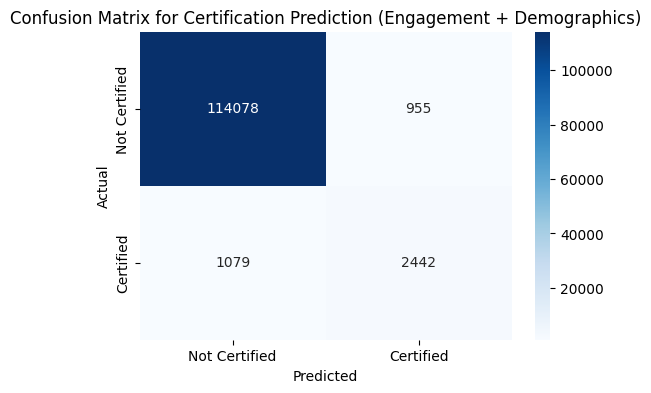

In [39]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select engagement and demographic features
features = ['nforum_posts', 'ndays_act', 'nchapters', 'LoE_DI', 'final_cc_cname_DI']  # Combining engagement and demographic features

# One-hot encode categorical demographic features (e.g., LoE_DI, final_cc_cname_DI)
df_prepared = pd.get_dummies(df_cleaned[features], drop_first=True)  # Convert categorical variables into dummy/indicator variables

# Target variable
y = df_cleaned['certified']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_prepared, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = rf_model.score(X_test, y_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
plt.title('Confusion Matrix for Certification Prediction (Engagement + Demographics)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\16276376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='coolwarm')


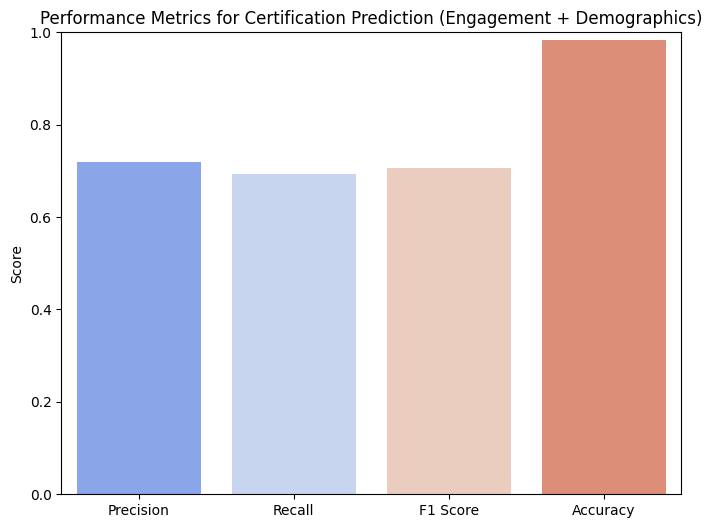

In [40]:
# Plotting Precision, Recall, F1-Score, and Accuracy in a bar chart
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

# Create a bar plot for the metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values, palette='coolwarm')
plt.title('Performance Metrics for Certification Prediction (Engagement + Demographics)')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


In [41]:
# Define thresholds for low engagement (you can adjust these based on your data distribution)
low_forum_posts = 1  # Example: Less than 2 forum posts
low_active_days = 5  # Example: Less than 5 active days
low_chapters = 3     # Example: Less than 3 chapters explored

# Identify at-risk students who are not certified and have low engagement
at_risk_students = df_cleaned[
    (df_cleaned['certified'] == 0) &  # Not certified
    (df_cleaned['nforum_posts'] <= low_forum_posts) &  # Low forum posts
    (df_cleaned['ndays_act'] <= low_active_days) &  # Low active days
    (df_cleaned['nchapters'] <= low_chapters)  # Low chapters explored
]

# Display the at-risk students
print(at_risk_students.head())  # Show the first few rows of the at-risk students


    index                    course_id       userid_DI  registered  viewed  \
8       8   HarvardX/CB22x/2013_Spring  MHxPC130088379           1       1   
10     10   HarvardX/ER22x/2013_Spring  MHxPC130088379           1       1   
11     11   HarvardX/ER22x/2013_Spring  MHxPC130198098           1       1   
13     13          HarvardX/CS50x/2012  MHxPC130024894           1       1   
16     16  HarvardX/PH278x/2013_Spring  MHxPC130024894           1       1   

    explored  certified final_cc_cname_DI   LoE_DI     YoB  ... grade  \
8          0          0     United States  Unknown  1988.0  ...     0   
10         0          0     United States  Unknown  1988.0  ...     0   
11         0          0     United States  Unknown  1988.0  ...     0   
13         0          0     United States  Unknown  1988.0  ...     0   
16         0          0     United States  Unknown  1988.0  ...     0   

   start_time_DI last_event_DI nforum_posts  ndays_act  nchapters  \
8     2013-02-18    201

In [42]:
# Checking for non-numeric values in the relevant columns
print(df_cleaned[features].dtypes)

# Checking for rows with non-numeric data in these columns
non_numeric_rows = df_cleaned[features][~df_cleaned[features].applymap(lambda x: isinstance(x, (int, float)))]
print(non_numeric_rows.head())
# Convert non-numeric values to NaN
df_cleaned[features] = df_cleaned[features].apply(pd.to_numeric, errors='coerce')

# Fill NaN values (caused by conversion or missing values) with a default value (e.g., median or 0)
df_cleaned[features] = df_cleaned[features].fillna(df_cleaned[features].median())


nforum_posts           int64
ndays_act            float64
nchapters            float64
LoE_DI                object
final_cc_cname_DI     object
dtype: object


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3539266475.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_rows = df_cleaned[features][~df_cleaned[features].applymap(lambda x: isinstance(x, (int, float)))]


   nforum_posts  ndays_act  nchapters   LoE_DI final_cc_cname_DI
0           NaN        NaN        NaN  Unknown     United States
1           NaN        NaN        NaN  Unknown     United States
2           NaN        NaN        NaN  Unknown     United States
3           NaN        NaN        NaN  Unknown     United States
4           NaN        NaN        NaN  Unknown     United States


Precision: 0.9692611393119007
Recall: 0.9761431411530815
F1 Score: 0.9726899674543653
Accuracy: 0.9983720498675709


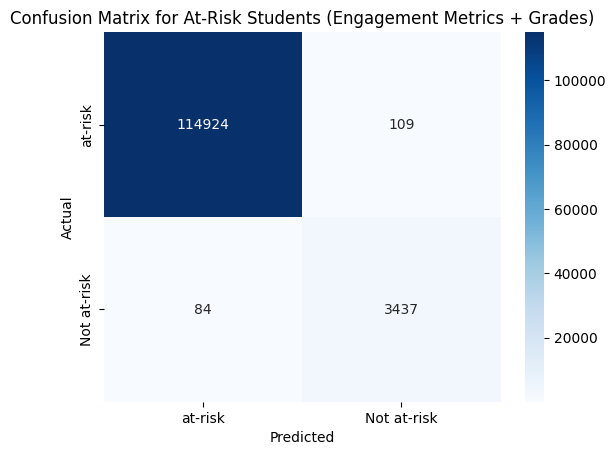

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       0.97      0.98      0.97      3521

    accuracy                           1.00    118554
   macro avg       0.98      0.99      0.99    118554
weighted avg       1.00      1.00      1.00    118554



In [44]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Adding 'grade' to the list of features
features = ['nforum_posts', 'ndays_act', 'nchapters', 'grade']  # Features list
target = 'certified'  # Target variable

# Converting non-numeric values to NaN and filling them with median
df_cleaned[features] = df_cleaned[features].apply(pd.to_numeric, errors='coerce')
df_cleaned[features] = df_cleaned[features].fillna(df_cleaned[features].median())

# Extracting the feature matrix X and target vector y
X = df_cleaned[features]
y = df_cleaned[target]

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculating performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the performance metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['at-risk', 'Not at-risk'], yticklabels=['at-risk', 'Not at-risk'])
plt.title('Confusion Matrix for At-Risk Students (Engagement Metrics + Grades)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying the classification report for detailed analysis
print(classification_report(y_test, y_pred))



C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3888688597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')


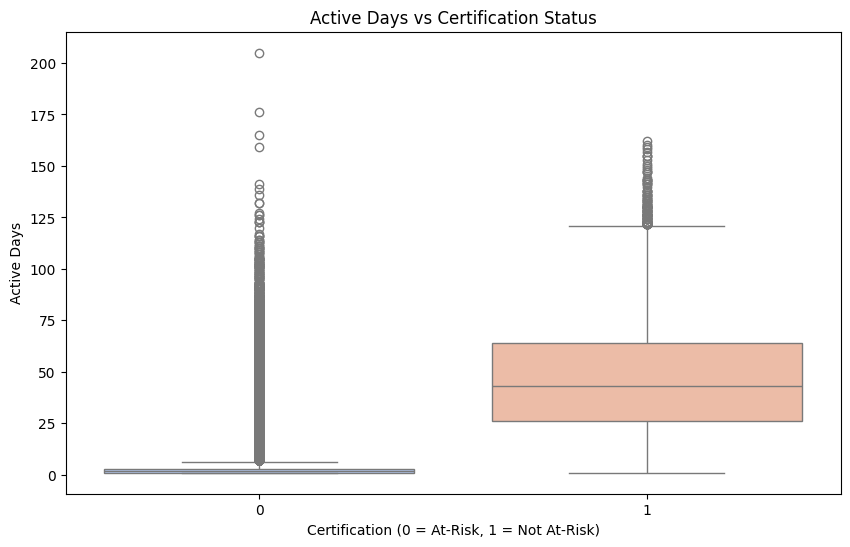

In [45]:
# Box plot to show the spread of Active Days across At-Risk and Not-At-Risk students
plt.figure(figsize=(10, 6))
sns.boxplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')
plt.title('Active Days vs Certification Status')
plt.xlabel('Certification (0 = At-Risk, 1 = Not At-Risk)')
plt.ylabel('Active Days')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3849958436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')


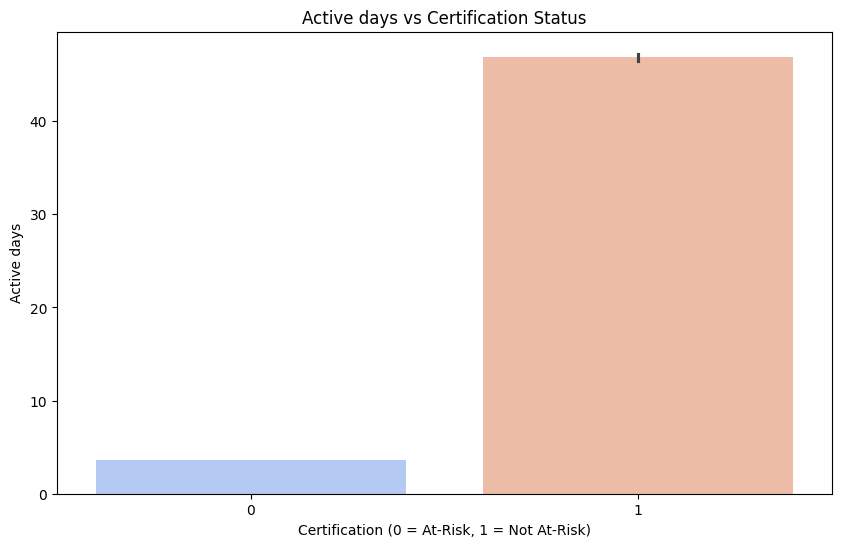

In [46]:
# Bar plot to show the distribution of Forum Posts by Certification Status (At-Risk vs Non-At-Risk)
plt.figure(figsize=(10, 6))
sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')
plt.title('Active days vs Certification Status')
plt.xlabel('Certification (0 = At-Risk, 1 = Not At-Risk)')
plt.ylabel('Active days')
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

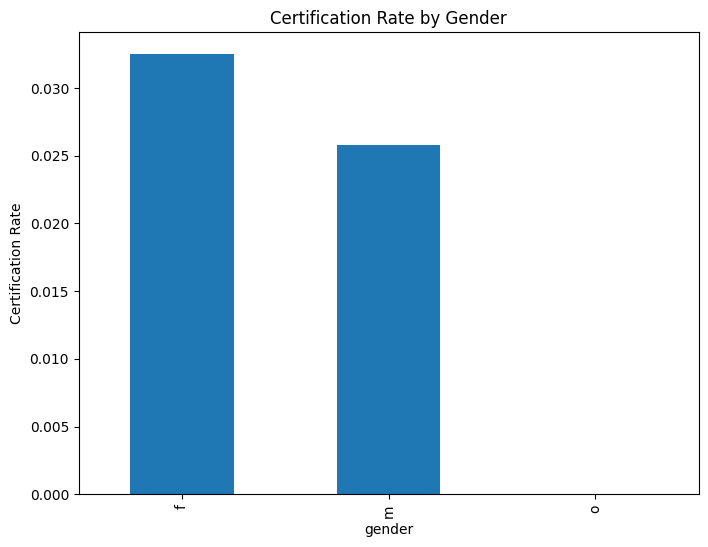

In [47]:
# Certification rate by gender
certification_by_gender = df_cleaned.groupby('gender')['certified'].mean()

# Certification rate by level of education
certification_by_education = df_cleaned.groupby('LoE_DI')['certified'].mean()

# Certification rate by country
certification_by_country = df_cleaned.groupby('final_cc_cname_DI')['certified'].mean()

# Plotting
certification_by_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Certification Rate by Gender')
plt.ylabel('Certification Rate')

certification_by_education.plot(kind='bar', figsize=(8, 6))
plt.title('Certification Rate by Level of Education')
plt.ylabel('Certification Rate')

certification_by_country.plot(kind='bar', figsize=(12, 6))
plt.title('Certification Rate by Country')
plt.ylabel('Certification Rate')


Text(0, 0.5, 'Certification Rate')

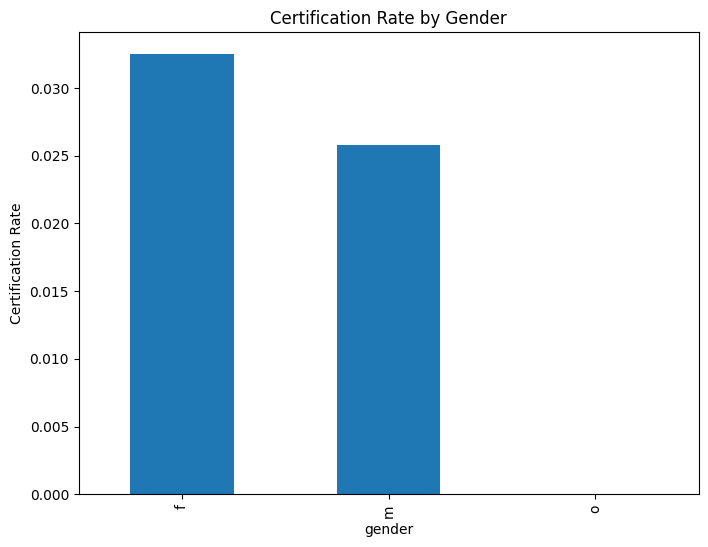

In [48]:
certification_by_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Certification Rate by Gender')
plt.ylabel('Certification Rate')

IndexError: index 0 is out of bounds for axis 0 with size 0

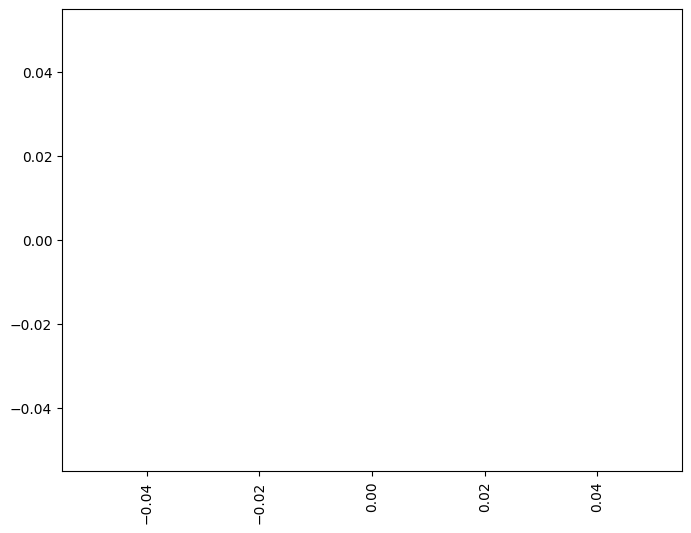

In [49]:
certification_by_education.plot(kind='bar', figsize=(8, 6))
plt.title('Certification Rate by Level of Education')
plt.ylabel('Certification Rate')

In [57]:
 features = ['viewed', 'explored', 'nchapters', 'nforum_posts', 'ndays_act']  # Available features for the model
target = 'certified'  # Target variable

# Extracting the feature matrix X and target vector y
X = df_cleaned[features].fillna(0)  # Fill missing values with 0
y = df_cleaned[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115033
           1       0.76      0.68      0.72      3521

    accuracy                           0.98    118554
   macro avg       0.87      0.84      0.86    118554
weighted avg       0.98      0.98      0.98    118554



C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3947432600.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='coolwarm')


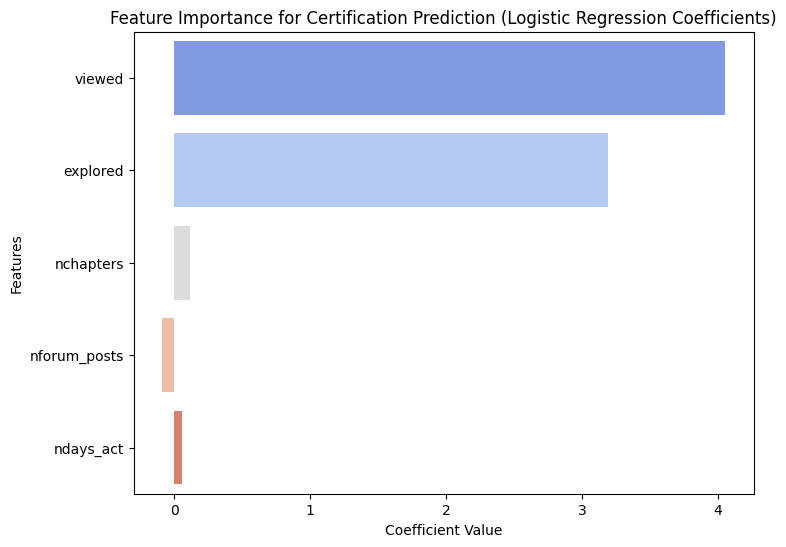

In [58]:
import numpy as np
#1 
# Extracting the feature coefficients
coefficients = log_reg_model.coef_[0]
features = ['viewed', 'explored', 'nchapters', 'nforum_posts', 'ndays_act']

# Creating a bar plot for the coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=features, palette='coolwarm')
plt.title('Feature Importance for Certification Prediction (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

Certification Rates by Country:
 Series([], Name: certified, dtype: float64)


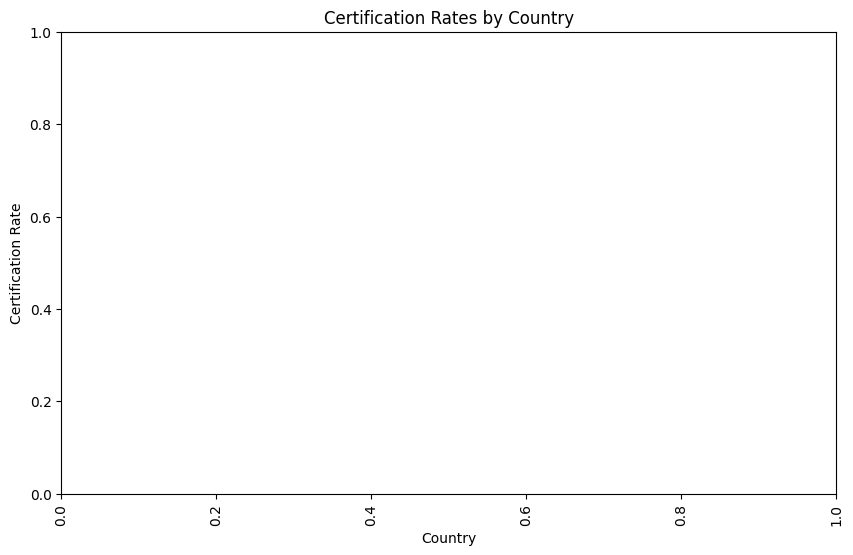

In [73]:
# Certification rates by country
cert_by_country = df_cleaned.groupby('final_cc_cname_DI')['certified'].mean().sort_values(ascending=False)

# Displaying the results
print("Certification Rates by Country:\n", cert_by_country)

# Plotting the certification rates by country
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=cert_by_country.index, y=cert_by_country.values, palette='coolwarm')
plt.title('Certification Rates by Country')
plt.xlabel('Country')
plt.ylabel('Certification Rate')
plt.xticks(rotation=90)
plt.show()


Certification Rates by Level of Education:
 Series([], Name: certified, dtype: float64)


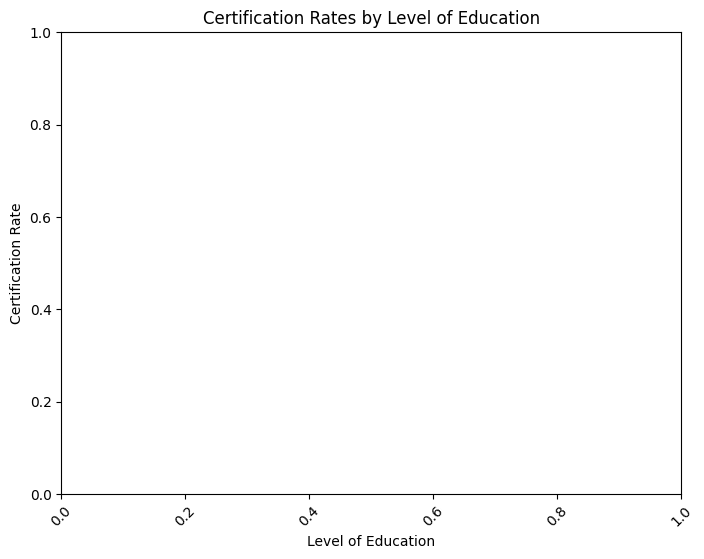

In [74]:
# Certification rates by level of education
cert_by_education = df_cleaned.groupby('LoE_DI')['certified'].mean().sort_values(ascending=False)

# Displaying the results
print("Certification Rates by Level of Education:\n", cert_by_education)

# Plotting the certification rates by level of education
plt.figure(figsize=(8, 6))
sns.barplot(x=cert_by_education.index, y=cert_by_education.values, palette='coolwarm')
plt.title('Certification Rates by Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Certification Rate')
plt.xticks(rotation=45)
plt.show()


Certification Rates by Year of Birth:
 YoB
1939.0    0.074074
1937.0    0.067797
1988.0    0.038871
1951.0    0.035484
1946.0    0.035032
            ...   
2009.0    0.000000
2010.0    0.000000
2011.0    0.000000
2012.0    0.000000
2013.0    0.000000
Name: certified, Length: 78, dtype: float64


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\1397514895.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cert_by_yob.index, y=cert_by_yob.values, palette='coolwarm')


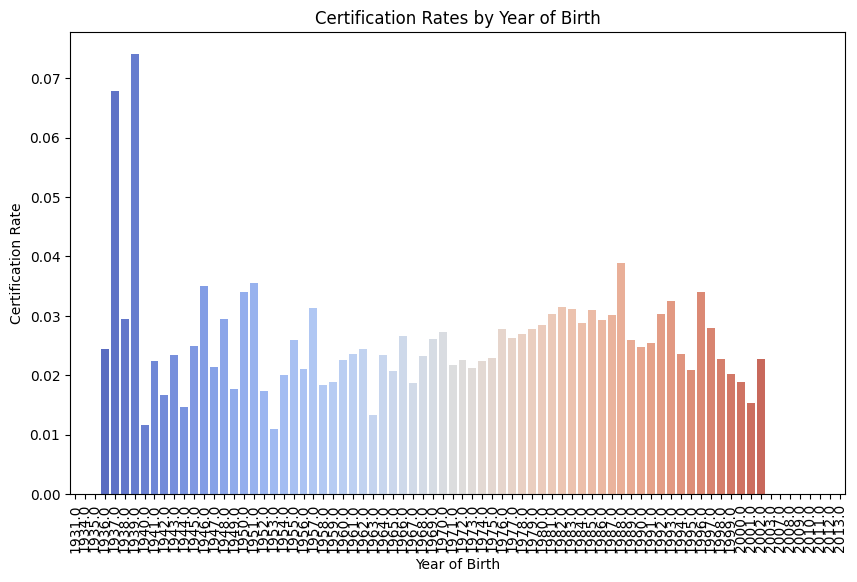

In [75]:
# Certification rates by year of birth
cert_by_yob = df_cleaned.groupby('YoB')['certified'].mean().sort_values(ascending=False)

# Displaying the results
print("Certification Rates by Year of Birth:\n", cert_by_yob)

# Plotting the certification rates by year of birth
plt.figure(figsize=(10, 6))
sns.barplot(x=cert_by_yob.index, y=cert_by_yob.values, palette='coolwarm')
plt.title('Certification Rates by Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Certification Rate')
plt.xticks(rotation=90)
plt.show()



In [78]:
print(cert_by_yob)
print(cert_by_education)

YoB
1939.0    0.074074
1937.0    0.067797
1988.0    0.038871
1951.0    0.035484
1946.0    0.035032
            ...   
2009.0    0.000000
2010.0    0.000000
2011.0    0.000000
2012.0    0.000000
2013.0    0.000000
Name: certified, Length: 78, dtype: float64
Series([], Name: certified, dtype: float64)


Certification Rates by Gender:
 gender
f    0.032495
m    0.025797
o    0.000000
Name: certified, dtype: float64


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\1271315043.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cert_by_gender.index, y=cert_by_gender.values, palette='coolwarm')


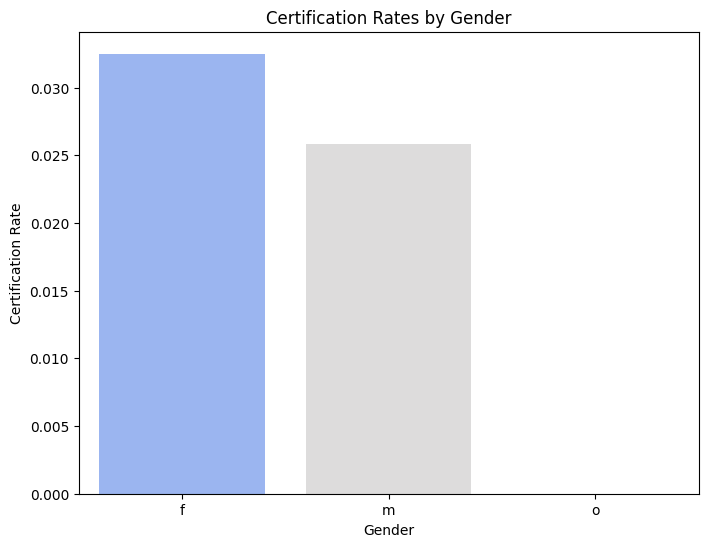

In [76]:
# Certification rates by gender
cert_by_gender = df_cleaned.groupby('gender')['certified'].mean().sort_values(ascending=False)

# Displaying the results
print("Certification Rates by Gender:\n", cert_by_gender)

# Plotting the certification rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=cert_by_gender.index, y=cert_by_gender.values, palette='coolwarm')
plt.title('Certification Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Certification Rate')
plt.show()


In [71]:
print(df_cleaned.columns)

Index(['index', 'course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nforum_posts', 'ndays_act',
       'nchapters', 'engagement_category', 'cluster', 'engagement_cluster',
       'personalized_strategy'],
      dtype='object')


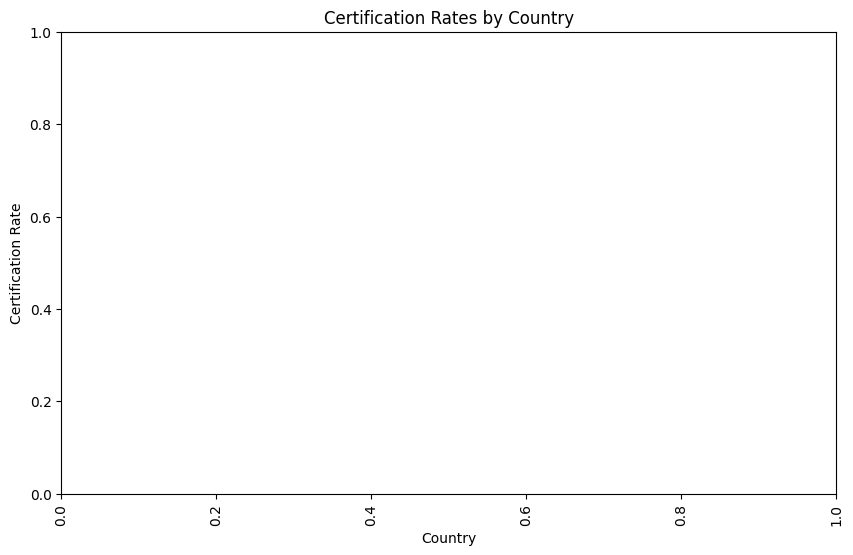

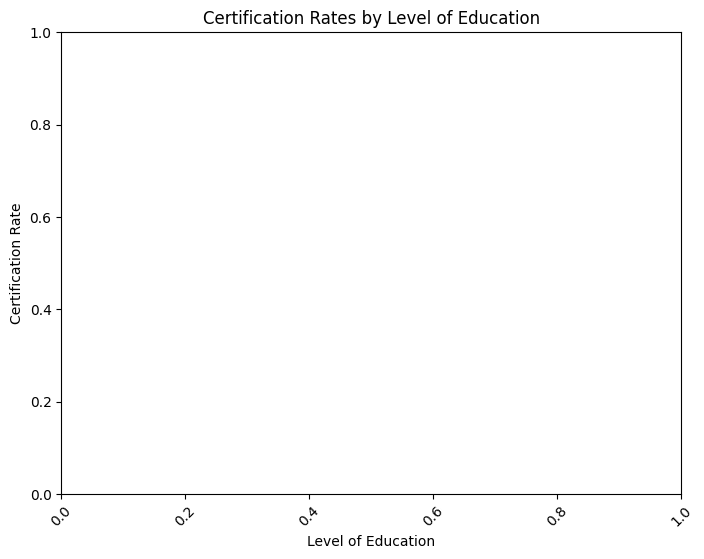

C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2095316330.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cert_by_yob.index, y=cert_by_yob.values, palette='coolwarm')


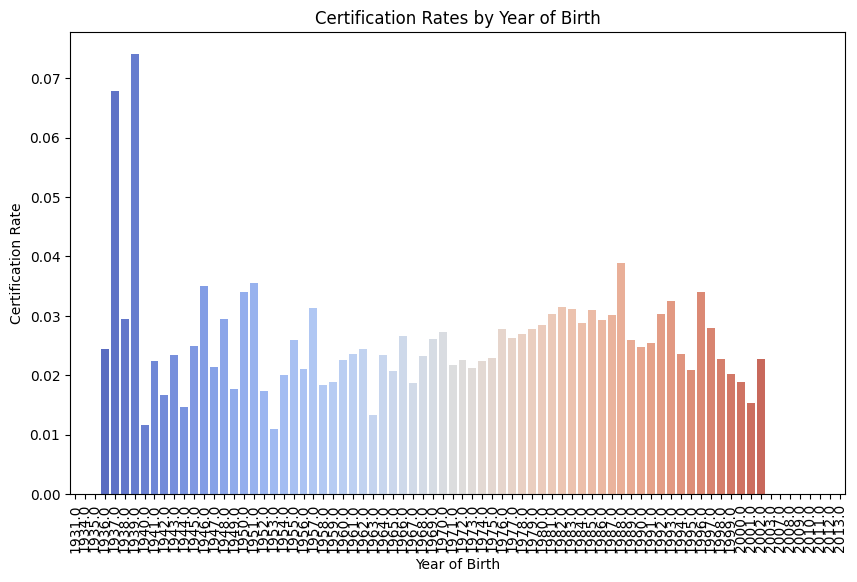

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certification Rates by Country
plt.figure(figsize=(10, 6))
sns.barplot(x=cert_by_country.index, y=cert_by_country.values, palette='coolwarm')
plt.title('Certification Rates by Country')
plt.xlabel('Country')
plt.ylabel('Certification Rate')
plt.xticks(rotation=90)
plt.show()

# Certification Rates by Level of Education
plt.figure(figsize=(8, 6))
sns.barplot(x=cert_by_education.index, y=cert_by_education.values, palette='coolwarm')
plt.title('Certification Rates by Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Certification Rate')
plt.xticks(rotation=45)
plt.show()

# Certification Rates by Year of Birth
plt.figure(figsize=(10, 6))
sns.barplot(x=cert_by_yob.index, y=cert_by_yob.values, palette='coolwarm')
plt.title('Certification Rates by Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Certification Rate')
plt.xticks(rotation=90)
plt.show()


In [79]:
# Selecting engagement and performance columns
#4
engagement_columns = ['nchapters', 'nforum_posts', 'ndays_act']
performance_columns = ['grade', 'certified']

# Calculating correlations between engagement metrics and performance metrics
correlations = df_cleaned[engagement_columns + performance_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlations)


Correlation Matrix:
               nchapters  nforum_posts  ndays_act     grade  certified
nchapters      1.000000      0.167193   0.706990  0.725156   0.660871
nforum_posts   0.167193      1.000000   0.214347  0.155756   0.143055
ndays_act      0.706990      0.214347   1.000000  0.749159   0.690097
grade          0.725156      0.155756   0.749159  1.000000   0.935727
certified      0.660871      0.143055   0.690097  0.935727   1.000000


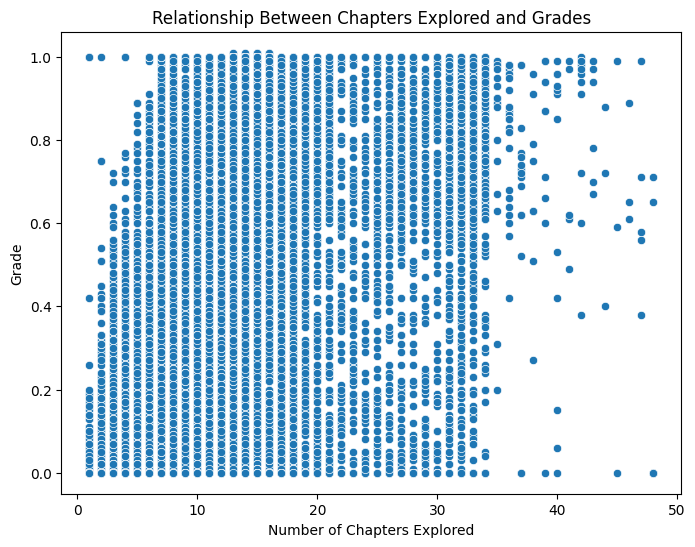

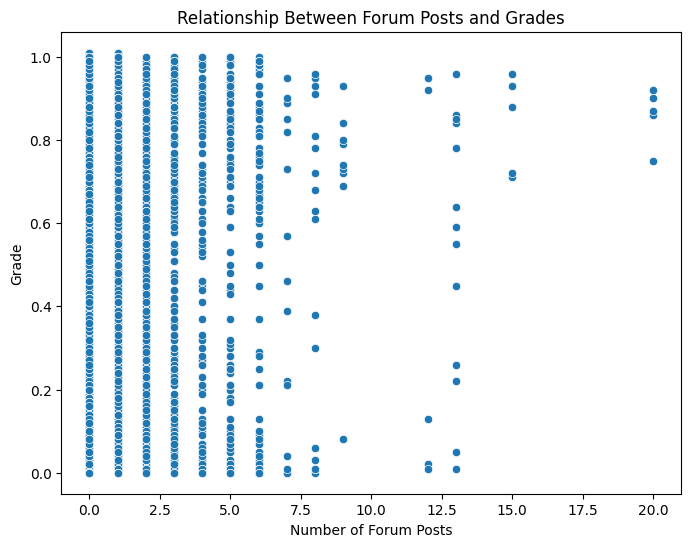

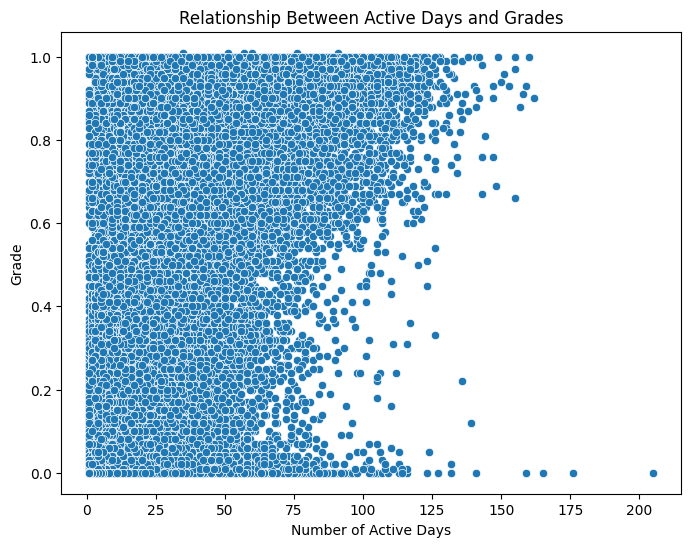

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for nchapters vs grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x='nchapters', y='grade', data=df_cleaned)
plt.title('Relationship Between Chapters Explored and Grades')
plt.xlabel('Number of Chapters Explored')
plt.ylabel('Grade')
plt.show()

# Scatter plot for nforum_posts vs grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x='nforum_posts', y='grade', data=df_cleaned)
plt.title('Relationship Between Forum Posts and Grades')
plt.xlabel('Number of Forum Posts')
plt.ylabel('Grade')
plt.show()

# Scatter plot for ndays_act vs grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ndays_act', y='grade', data=df_cleaned)
plt.title('Relationship Between Active Days and Grades')
plt.xlabel('Number of Active Days')
plt.ylabel('Grade')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2941293181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='nchapters', data=df_cleaned, palette='coolwarm')


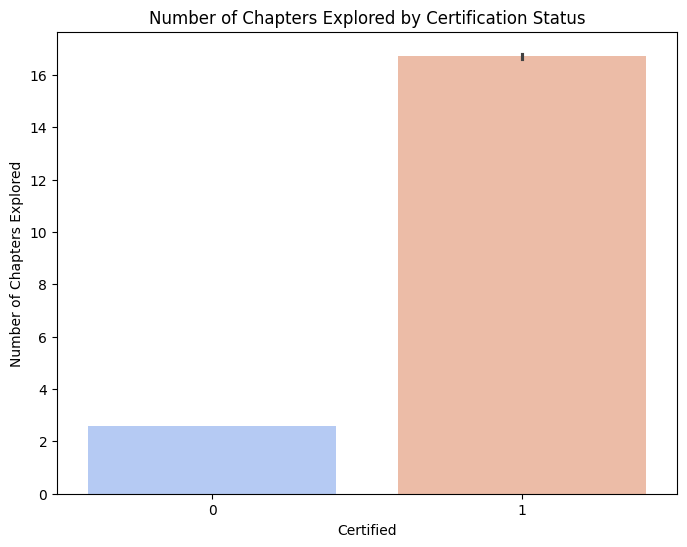

C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2941293181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='nforum_posts', data=df_cleaned, palette='coolwarm')


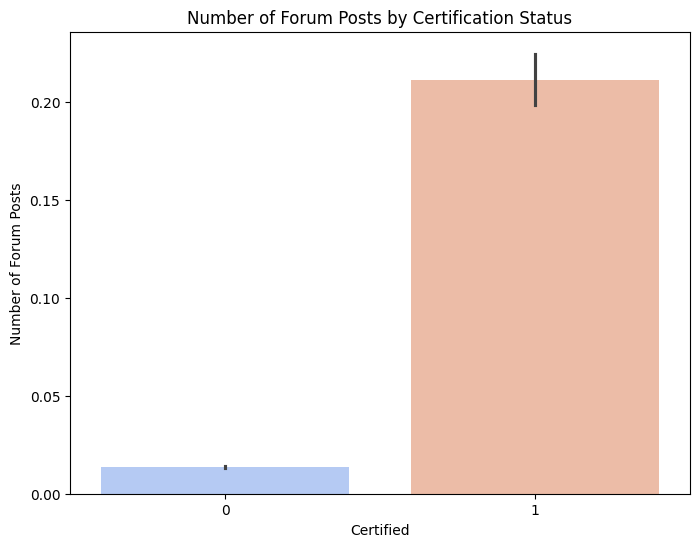

C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2941293181.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')


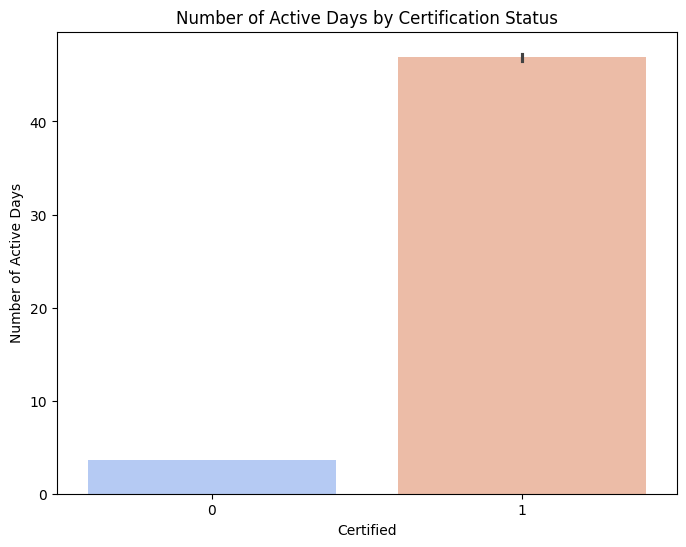

In [81]:
# Bar plot for certification vs. nchapters
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='nchapters', data=df_cleaned, palette='coolwarm')
plt.title('Number of Chapters Explored by Certification Status')
plt.xlabel('Certified')
plt.ylabel('Number of Chapters Explored')
plt.show()

# Bar plot for certification vs. nforum_posts
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='nforum_posts', data=df_cleaned, palette='coolwarm')
plt.title('Number of Forum Posts by Certification Status')
plt.xlabel('Certified')
plt.ylabel('Number of Forum Posts')
plt.show()

# Bar plot for certification vs. ndays_act
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')
plt.title('Number of Active Days by Certification Status')
plt.xlabel('Certified')
plt.ylabel('Number of Active Days')
plt.show()


In [82]:
# Selecting time-related and performance columns 
#5
time_columns = ['start_time_DI', 'last_event_DI', 'ndays_act']
performance_columns = ['grade', 'certified']

# Converting the time-related columns to datetime format if they are not already
df_cleaned['start_time_DI'] = pd.to_datetime(df_cleaned['start_time_DI'], errors='coerce')
df_cleaned['last_event_DI'] = pd.to_datetime(df_cleaned['last_event_DI'], errors='coerce')

# Calculating time duration (days) between start and last event
df_cleaned['duration'] = (df_cleaned['last_event_DI'] - df_cleaned['start_time_DI']).dt.days

# Correlation matrix for time-related and performance metrics
correlation_matrix = df_cleaned[time_columns + ['duration'] + performance_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                start_time_DI  last_event_DI  ndays_act  duration     grade  \
start_time_DI       1.000000       0.273889  -0.044168 -0.274655 -0.019516   
last_event_DI       0.273889       1.000000   0.146230  0.475480  0.141028   
ndays_act          -0.044168       0.146230   1.000000  0.413043  0.749159   
duration           -0.274655       0.475480   0.413043  1.000000  0.315800   
grade              -0.019516       0.141028   0.749159  0.315800  1.000000   
certified          -0.014237       0.111157   0.690097  0.283109  0.935727   

               certified  
start_time_DI  -0.014237  
last_event_DI   0.111157  
ndays_act       0.690097  
duration        0.283109  
grade           0.935727  
certified       1.000000  


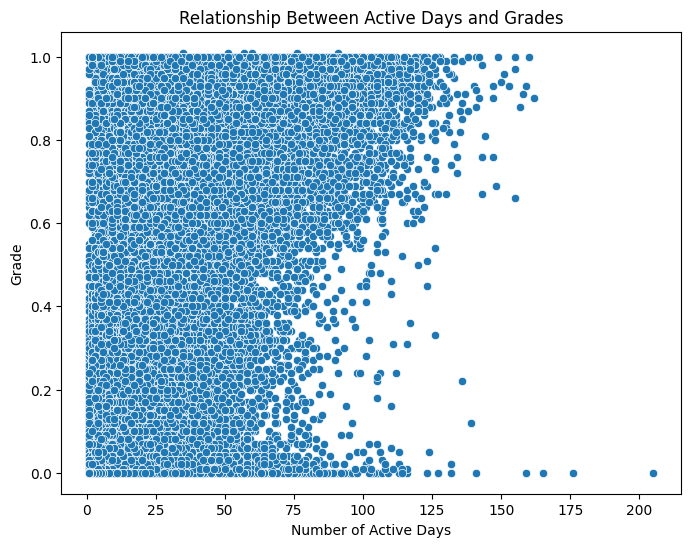

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: ndays_act vs grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ndays_act', y='grade', data=df_cleaned)
plt.title('Relationship Between Active Days and Grades')
plt.xlabel('Number of Active Days')
plt.ylabel('Grade')
plt.show()


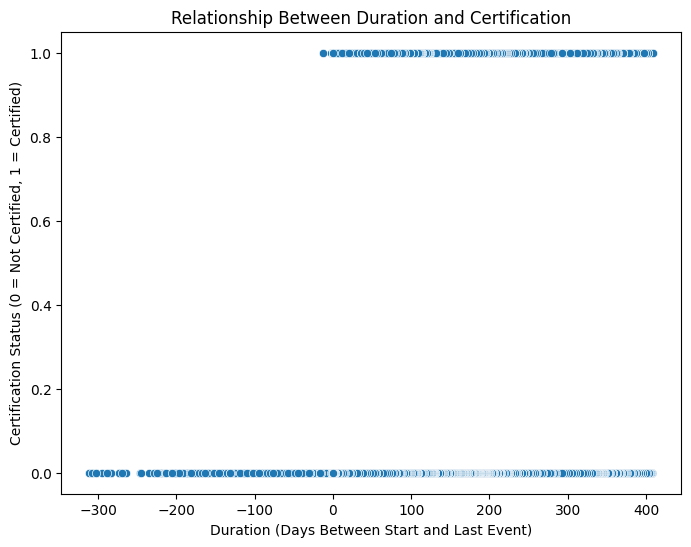

In [84]:
# Scatter plot: duration vs certification
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='certified', data=df_cleaned)
plt.title('Relationship Between Duration and Certification')
plt.xlabel('Duration (Days Between Start and Last Event)')
plt.ylabel('Certification Status (0 = Not Certified, 1 = Certified)')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\2801021891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')


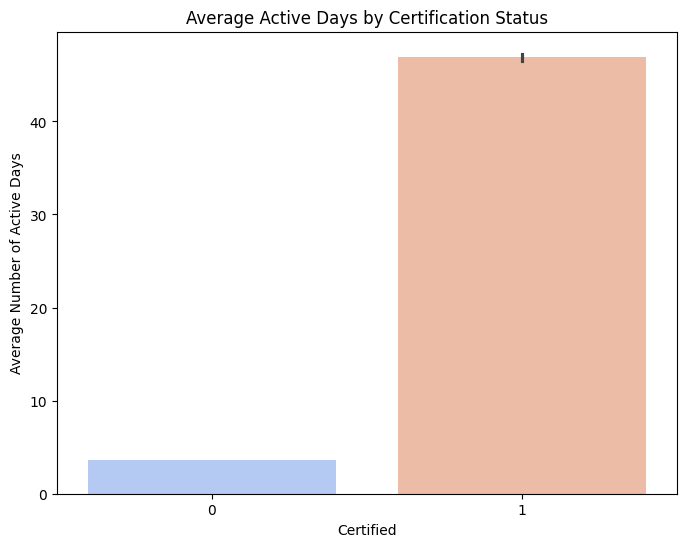

In [85]:
# Bar plot: certification vs. ndays_act
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='ndays_act', data=df_cleaned, palette='coolwarm')
plt.title('Average Active Days by Certification Status')
plt.xlabel('Certified')
plt.ylabel('Average Number of Active Days')
plt.show()


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\1250092130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='certified', y='duration', data=df_cleaned, palette='coolwarm')


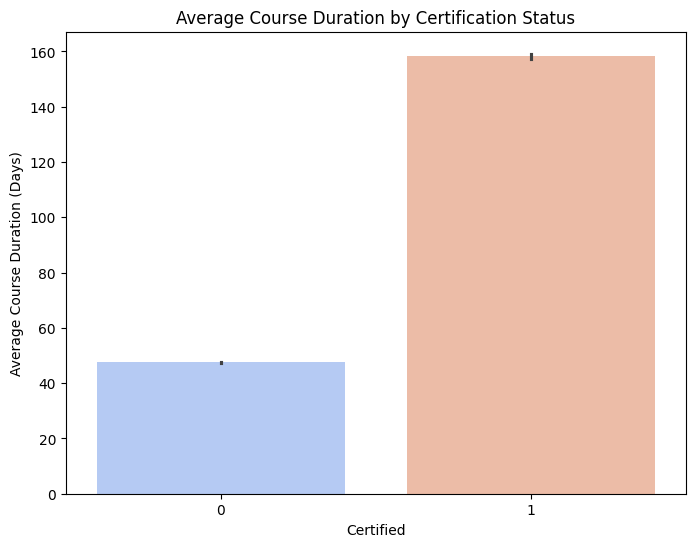

In [86]:
# Bar plot: certification vs. duration
plt.figure(figsize=(8, 6))
sns.barplot(x='certified', y='duration', data=df_cleaned, palette='coolwarm')
plt.title('Average Course Duration by Certification Status')
plt.xlabel('Certified')
plt.ylabel('Average Course Duration (Days)')
plt.show()


In [87]:
# Calculate certification rates by course
cert_by_course = df_cleaned.groupby('course_id')['certified'].mean().sort_values(ascending=False)
#6
# Display the results
print("Certification Rates by Course:\n", cert_by_course)


Certification Rates by Course:
 course_id
MITx/14.73x/2013_Spring        0.078466
MITx/6.002x/2012_Fall          0.052741
HarvardX/PH207x/2012_Fall      0.051621
HarvardX/ER22x/2013_Spring     0.047590
MITx/3.091x/2012_Fall          0.044469
MITx/2.01x/2013_Spring         0.043686
MITx/7.00x/2013_Spring         0.039187
MITx/6.00x/2012_Fall           0.037122
MITx/6.002x/2013_Spring        0.033123
MITx/8.MReV/2013_Summer        0.031339
MITx/8.02x/2013_Spring         0.027967
MITx/3.091x/2013_Spring        0.024856
MITx/6.00x/2013_Spring         0.024684
HarvardX/PH278x/2013_Spring    0.021637
HarvardX/CB22x/2013_Spring     0.015438
HarvardX/CS50x/2012            0.007588
Name: certified, dtype: float64


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\292501811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cert_by_course.index, y=cert_by_course.values, palette='coolwarm')


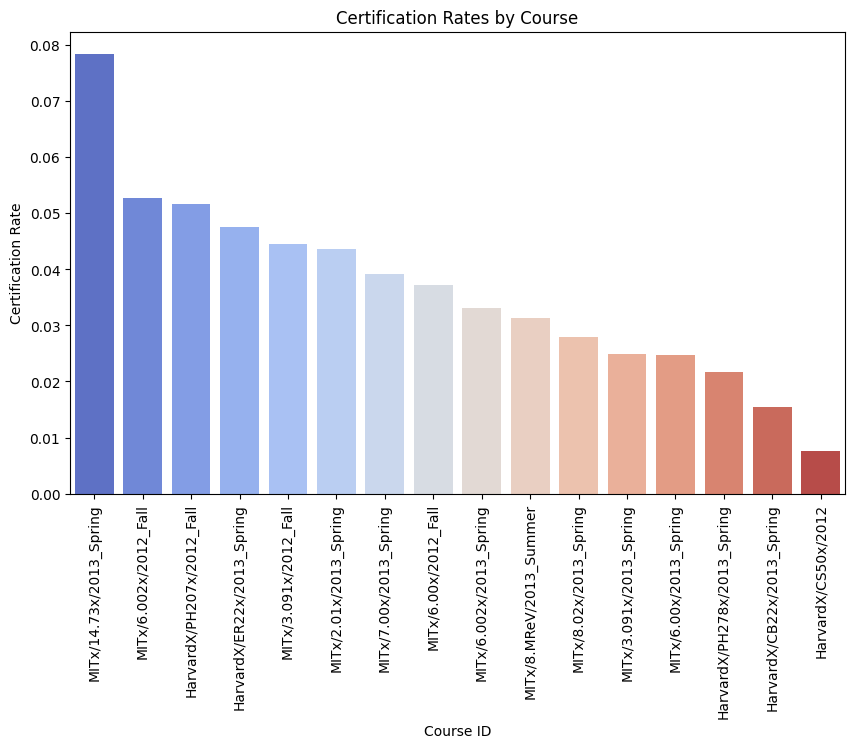

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the certification rates by course
plt.figure(figsize=(10, 6))
sns.barplot(x=cert_by_course.index, y=cert_by_course.values, palette='coolwarm')
plt.title('Certification Rates by Course')
plt.xlabel('Course ID')
plt.ylabel('Certification Rate')
plt.xticks(rotation=90)
plt.show()


Average Number of Active Days by Course:
 course_id
MITx/6.00x/2012_Fall           6.912118
MITx/6.002x/2012_Fall          6.757361
MITx/8.02x/2013_Spring         6.710942
MITx/2.01x/2013_Spring         6.614786
HarvardX/PH207x/2012_Fall      6.587086
MITx/7.00x/2013_Spring         6.552090
MITx/6.00x/2013_Spring         6.065541
MITx/14.73x/2013_Spring        5.711802
MITx/6.002x/2013_Spring        5.429593
MITx/3.091x/2012_Fall          5.368140
MITx/8.MReV/2013_Summer        4.987654
MITx/3.091x/2013_Spring        4.882205
HarvardX/ER22x/2013_Spring     4.305441
HarvardX/CB22x/2013_Spring     3.832670
HarvardX/PH278x/2013_Spring    3.774072
HarvardX/CS50x/2012            2.796741
Name: ndays_act, dtype: float64


C:\Users\gurun\AppData\Local\Temp\ipykernel_16460\3252299596.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ndays_by_course.index, y=avg_ndays_by_course.values, palette='coolwarm')


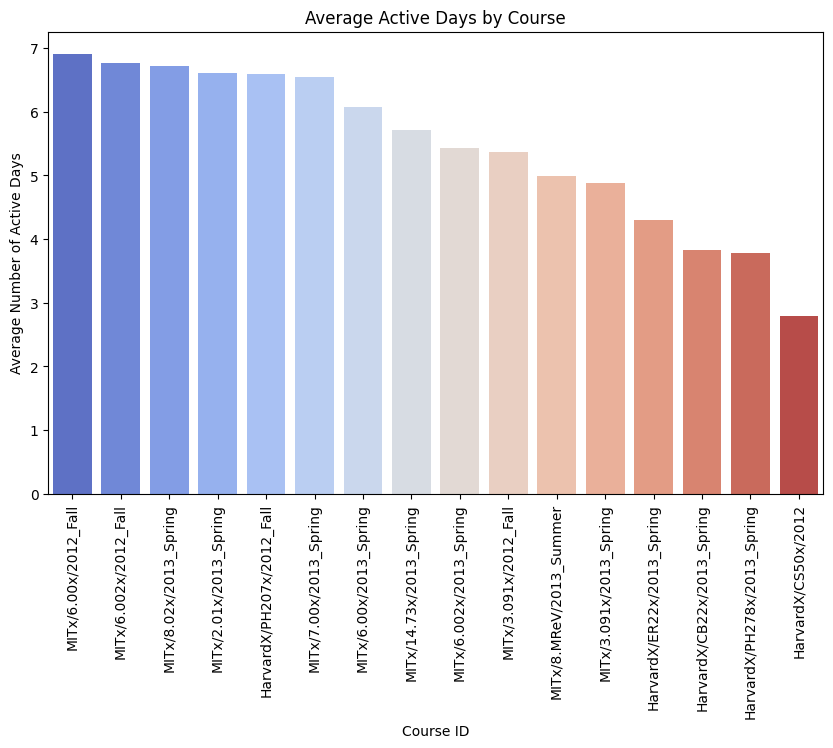

In [89]:
# Average number of active days by course
avg_ndays_by_course = df_cleaned.groupby('course_id')['ndays_act'].mean().sort_values(ascending=False)

# Display the results
print("Average Number of Active Days by Course:\n", avg_ndays_by_course)

# Plotting the average active days by course
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ndays_by_course.index, y=avg_ndays_by_course.values, palette='coolwarm')
plt.title('Average Active Days by Course')
plt.xlabel('Course ID')
plt.ylabel('Average Number of Active Days')
plt.xticks(rotation=90)
plt.show()

# Similarly, you can analyze other engagement metrics like nchapters or nforum_posts


                             certified  ndays_act  nchapters  nforum_posts
course_id                                                                 
MITx/14.73x/2013_Spring       0.078466   5.711802   2.775327      0.013586
MITx/6.002x/2012_Fall         0.052741   6.757361   3.422953      0.025798
HarvardX/PH207x/2012_Fall     0.051621   6.587086   3.530785      0.023120
HarvardX/ER22x/2013_Spring    0.047590   4.305441   4.710220      0.048726
MITx/3.091x/2012_Fall         0.044469   5.368140   2.780960      0.008655
MITx/2.01x/2013_Spring        0.043686   6.614786   2.960028      0.015387
MITx/7.00x/2013_Spring        0.039187   6.552090   3.214265      0.077183
MITx/6.00x/2012_Fall          0.037122   6.912118   3.134251      0.040164
MITx/6.002x/2013_Spring       0.033123   5.429593   3.117801      0.006759
MITx/8.MReV/2013_Summer       0.031339   4.987654   4.365833      0.014878
MITx/8.02x/2013_Spring        0.027967   6.710942   3.376667      0.029396
MITx/3.091x/2013_Spring  

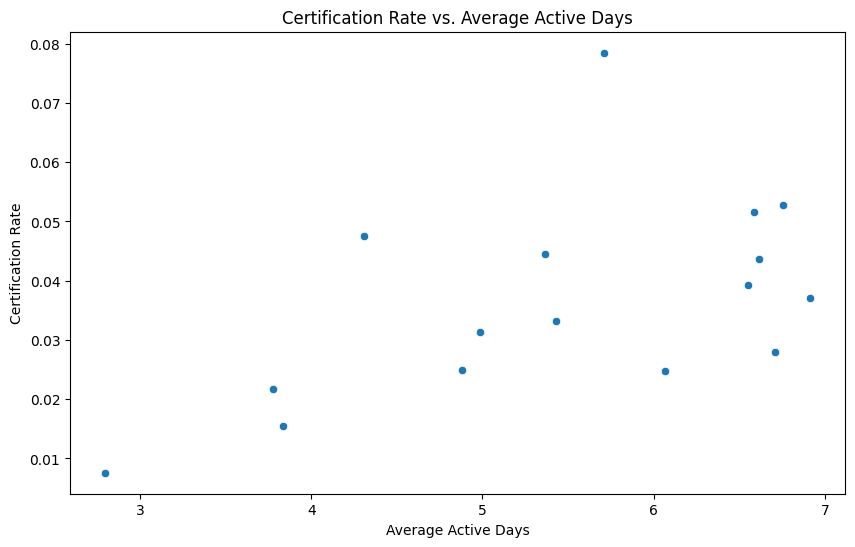

In [104]:
# Comparing certification rates with average number of active days
cert_and_ndays = df_cleaned.groupby('course_id').agg({
    'certified': 'mean',
    'ndays_act': 'mean',
    'nchapters': 'mean',
    'nforum_posts': 'mean'
}).sort_values(by='certified', ascending=False)

cert_and_engagement = df_cleaned.groupby('course_id').agg({
    'certified': 'mean',
    'ndays_act': 'mean',
    'nchapters': 'mean',
    'nforum_posts': 'mean'
}).sort_values(by='certified', ascending=False)

# Displaying the comparison
print(cert_and_ndays)

# Plotting Certification Rate vs Average Number of Active Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ndays_act', y='certified', data=cert_and_engagement)
plt.title('Certification Rate vs. Average Active Days')
plt.xlabel('Average Active Days')
plt.ylabel('Certification Rate')
plt.show()



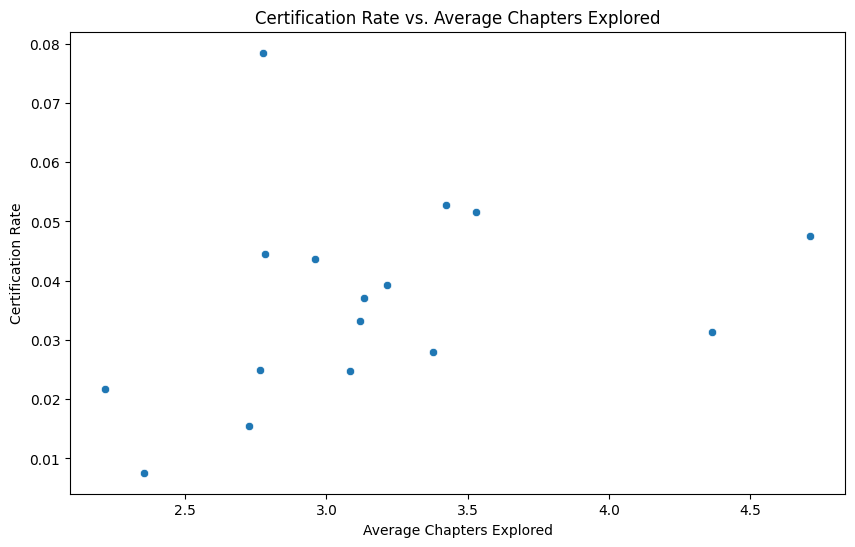

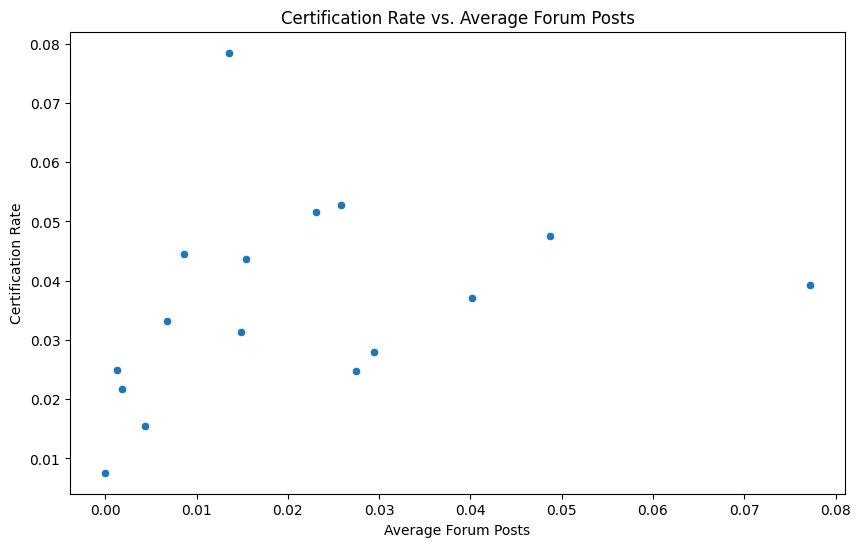

In [105]:
# Plotting Certification Rate vs Average Chapters Explored
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nchapters', y='certified', data=cert_and_engagement)
plt.title('Certification Rate vs. Average Chapters Explored')
plt.xlabel('Average Chapters Explored')
plt.ylabel('Certification Rate')
plt.show()

# Plotting Certification Rate vs Average Forum Posts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nforum_posts', y='certified', data=cert_and_engagement)
plt.title('Certification Rate vs. Average Forum Posts')
plt.xlabel('Average Forum Posts')
plt.ylabel('Certification Rate')
plt.show()

In [98]:
# Checking for missing values in the features and target
print(df_cleaned_encoded.isnull().sum())
print(target.isnull().sum())

# Filling missing values in numeric columns with the mean
df_cleaned_encoded = df_cleaned_encoded.fillna(df_cleaned_encoded.mean())

# Splitting the data after filling NaNs
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_encoded, target, test_size=0.2, random_state=42)


final_cc_cname_DI    0
LoE_DI               0
YoB                  0
nchapters            0
nforum_posts         0
ndays_act            0
gender_m             0
gender_o             0
dtype: int64
0


ValueError: Found input variables with inconsistent numbers of samples: [0, 592766]

In [101]:
print(df_cleaned)

         index                   course_id       userid_DI  registered  \
0            0  HarvardX/CB22x/2013_Spring  MHxPC130442623           1   
1            1         HarvardX/CS50x/2012  MHxPC130442623           1   
2            2  HarvardX/CB22x/2013_Spring  MHxPC130275857           1   
3            3         HarvardX/CS50x/2012  MHxPC130275857           1   
4            4  HarvardX/ER22x/2013_Spring  MHxPC130275857           1   
...        ...                         ...             ...         ...   
641041  641041     MITx/8.MReV/2013_Summer  MHxPC130293531           1   
641053  641053     MITx/8.MReV/2013_Summer  MHxPC130495746           1   
641113  641113     MITx/8.MReV/2013_Summer  MHxPC130261281           1   
641120  641120     MITx/8.MReV/2013_Summer  MHxPC130374105           1   
641122  641122     MITx/8.MReV/2013_Summer  MHxPC130556398           1   

        viewed  explored  certified  final_cc_cname_DI  LoE_DI     YoB  ...  \
0            0         0        

In [103]:
# Features (engagement metrics and demographic variables)
features = ['LoE_DI', 'final_cc_cname_DI', 'gender', 'YoB', 'nchapters', 'nforum_posts', 'ndays_act']

# One-hot encoding for categorical features
df_cleaned_encoded = pd.get_dummies(df_cleaned[features], drop_first=True)

# Target variable (certified)
target = df_cleaned['certified']

# Handling missing values
df_cleaned_encoded = df_cleaned_encoded.fillna(df_cleaned_encoded.mean())
target = target.fillna(target.mean())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_encoded, target, test_size=0.2, random_state=42)

# Training Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = log_reg_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values